In [33]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

### 1 - Verinin elde edilmesi

İlk olarak veriler oluşturulan excel içerisinden okunmalı ve pandas ile dataframe'e aktarılmalıdır. Bunun için pandas kütüphanesi kullanılmaktadır.

In [34]:
df = pd.read_excel('source/leaves.xlsx')
df_clean = df[df['status'].notna()]  # "None" olanları filtrele
df_clean['status'] = df_clean['status'].astype(int)  # Etiketleri tam sayıya çevir

C:\Users\Yasin\AppData\Local\Temp\ipykernel_9596\641972447.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['status'] = df_clean['status'].astype(int)  # Etiketleri tam sayıya çevir


In [35]:
df

,image_path,filtered_image_path,class,file_name,status
0,leaves/1/image_2024-05-27_16-41-31_0.jpg,processed_images/1/image_2024-05-27_16-41-31_0...,1,image_2024-05-27_16-41-31_0.jpg,1.0
1,leaves/1/image_2024-05-27_16-52-13_0.jpg,processed_images/1/image_2024-05-27_16-52-13_0...,1,image_2024-05-27_16-52-13_0.jpg,1.0
2,leaves/1/image_2024-05-27_17-02-54_0.jpg,processed_images/1/image_2024-05-27_17-02-54_0...,1,image_2024-05-27_17-02-54_0.jpg,1.0
3,leaves/1/image_2024-05-27_17-13-36_0.jpg,processed_images/1/image_2024-05-27_17-13-36_0...,1,image_2024-05-27_17-13-36_0.jpg,1.0
4,leaves/1/image_2024-05-27_17-24-18_0.jpg,processed_images/1/image_2024-05-27_17-24-18_0...,1,image_2024-05-27_17-24-18_0.jpg,1.0
...,...,...,...,...,...
3216,leaves/8/image_2024-06-04_13-57-18_2.jpg,processed_images/8/image_2024-06-04_13-57-18_2...,8,image_2024-06-04_13-57-18_2.jpg,0.0
3217,leaves/8/image_2024-06-04_14-08-01_2.jpg,processed_images/8/image_2024-06-04_14-08-01_2...,8,image_2024-06-04_14-08-01_2.jpg,0.0
3218,leaves/8/image_2024-06-04_14-18-43_2.jpg,processed_images/8/image_2024-06-04_14-18-43_2...,8,image_2024-06-04_14-18-43_2.jpg,0.0
3219,leaves/8/image_2024-06-04_14-29-25_2.jpg,processed_images/8/image_2024-06-04_14-29-25_2...,8,image_2024-06-04_14-29-25_2.jpg,0.0


Dataframe içerisinde (excel dosyasından da incelenebilir) orjinal resim path'i, class'ı, process edilmiş resmin path'i ve el ile işaretleme yapılmış status'u bulunmaktadır. Bu değer bitkide leke varsa 1 yoksa 0 olarak işaretlenmiştir. 

status 1 : Bitki hasta 

status 0 : Bitki sağlıklı 

In [36]:
class_distribution = df_clean['status'].value_counts()
print(f"Sınıf Dağılımı:\n{class_distribution}")

Sınıf Dağılımı:
status
1    2262
0     958
Name: count, dtype: int64


Verilerin train ve test olarak ayrıştırılması için sklearn kütüphanesinden train_test_split fonksiyonu ve GroupShuffleSplit sınıfı kullanılmaktadır. Bu fonksiyon ile veriler %80 train %20 test olacak şekilde ayrıştırılmaktadır.

In [37]:
from sklearn.model_selection import GroupShuffleSplit

splitter = GroupShuffleSplit(test_size=0.2, n_splits=1, random_state=42)
train_idx, test_idx = next(splitter.split(df_clean, groups=df_clean['class']))

train_df = df_clean.iloc[train_idx]
test_df = df_clean.iloc[test_idx]

In [38]:
test_df

,image_path,filtered_image_path,class,file_name,status
593,leaves/2/image_2024-05-27_16-41-31_3.jpg,processed_images/2/image_2024-05-27_16-41-31_3...,2,image_2024-05-27_16-41-31_3.jpg,0
595,leaves/2/image_2024-05-27_16-52-13_7.jpg,processed_images/2/image_2024-05-27_16-52-13_7...,2,image_2024-05-27_16-52-13_7.jpg,0
596,leaves/2/image_2024-05-27_17-02-54_5.jpg,processed_images/2/image_2024-05-27_17-02-54_5...,2,image_2024-05-27_17-02-54_5.jpg,0
597,leaves/2/image_2024-05-27_17-13-36_5.jpg,processed_images/2/image_2024-05-27_17-13-36_5...,2,image_2024-05-27_17-13-36_5.jpg,0
598,leaves/2/image_2024-05-27_17-24-18_5.jpg,processed_images/2/image_2024-05-27_17-24-18_5...,2,image_2024-05-27_17-24-18_5.jpg,0
...,...,...,...,...,...
2967,leaves/6/image_2024-06-04_14-18-43_4.jpg,processed_images/6/image_2024-06-04_14-18-43_4...,6,image_2024-06-04_14-18-43_4.jpg,0
2968,leaves/6/image_2024-06-04_14-29-25_3.jpg,processed_images/6/image_2024-06-04_14-29-25_3...,6,image_2024-06-04_14-29-25_3.jpg,1
2969,leaves/6/image_2024-06-04_14-29-25_4.jpg,processed_images/6/image_2024-06-04_14-29-25_4...,6,image_2024-06-04_14-29-25_4.jpg,0
2970,leaves/6/image_2024-06-04_14-40-07_3.jpg,processed_images/6/image_2024-06-04_14-40-07_3...,6,image_2024-06-04_14-40-07_3.jpg,0


In [39]:
train_df

,image_path,filtered_image_path,class,file_name,status
0,leaves/1/image_2024-05-27_16-41-31_0.jpg,processed_images/1/image_2024-05-27_16-41-31_0...,1,image_2024-05-27_16-41-31_0.jpg,1
1,leaves/1/image_2024-05-27_16-52-13_0.jpg,processed_images/1/image_2024-05-27_16-52-13_0...,1,image_2024-05-27_16-52-13_0.jpg,1
2,leaves/1/image_2024-05-27_17-02-54_0.jpg,processed_images/1/image_2024-05-27_17-02-54_0...,1,image_2024-05-27_17-02-54_0.jpg,1
3,leaves/1/image_2024-05-27_17-13-36_0.jpg,processed_images/1/image_2024-05-27_17-13-36_0...,1,image_2024-05-27_17-13-36_0.jpg,1
4,leaves/1/image_2024-05-27_17-24-18_0.jpg,processed_images/1/image_2024-05-27_17-24-18_0...,1,image_2024-05-27_17-24-18_0.jpg,1
...,...,...,...,...,...
3216,leaves/8/image_2024-06-04_13-57-18_2.jpg,processed_images/8/image_2024-06-04_13-57-18_2...,8,image_2024-06-04_13-57-18_2.jpg,0
3217,leaves/8/image_2024-06-04_14-08-01_2.jpg,processed_images/8/image_2024-06-04_14-08-01_2...,8,image_2024-06-04_14-08-01_2.jpg,0
3218,leaves/8/image_2024-06-04_14-18-43_2.jpg,processed_images/8/image_2024-06-04_14-18-43_2...,8,image_2024-06-04_14-18-43_2.jpg,0
3219,leaves/8/image_2024-06-04_14-29-25_2.jpg,processed_images/8/image_2024-06-04_14-29-25_2...,8,image_2024-06-04_14-29-25_2.jpg,0


train_test_split fonksiyonu ile veriler ayrıştırılırken, GroupShuffleSplit sınıfı ile de gruplar arasında karışıklık olmaması sağlanmaktadır. Ayrıca train içerisinden 0.1 oranında bir validation seti oluşturulmaktadır. Bu validation seti, modelin eğitim sürecinde modelin performansını değerlendirmek için kullanılmaktadır.

In [40]:
# Train'den validation ayır
from sklearn.model_selection import train_test_split


train_df, val_df = train_test_split(
    train_df, 
    test_size=0.1, 
    stratify=train_df['status'],  # Sınıf dağılımını koru
    random_state=42
)

## 2- Verinin ön işlenmesi ve formatlanması

Train, validation ve test veri setleri oluşturulurken:

- **Shuffle:** Veriler karıştırılarak modelin genelleme yeteneği artırılır.
- **TensorFlow Dataset:** DataFrame'deki `image_path` ve `status` kullanılarak `tf.data.Dataset` yapısı oluşturulur.
- **Map & Batch:** `load_and_preprocess_image` fonksiyonu ile ön işleme uygulanır, veriler batch'lere ayrılır.
- **Prefetch:** Eğitim sırasında I/O darboğazlarını azaltmak için veriler önceden yüklenir.


In [42]:
len(train_df), len(val_df), len(test_df)

(2076, 231, 913)

In [43]:

def load_and_preprocess_image(path, target_size=(224, 224)):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, target_size)
    img = tf.keras.applications.mobilenet_v2.preprocess_input(img)  
    return img

def create_dataset(df, batch_size=32, shuffle=False):
    paths = df['image_path'].values  
    labels = df['status'].values
    dataset = tf.data.Dataset.from_tensor_slices((paths, labels))
    
    if shuffle:
        dataset = dataset.shuffle(buffer_size=1000)
    
    dataset = dataset.map(
        lambda x, y: (load_and_preprocess_image(x), y),
        num_parallel_calls=tf.data.AUTOTUNE
    )
    dataset = dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return dataset

batch_size = 32
train_dataset = create_dataset(train_df, batch_size, shuffle=True)
val_dataset = create_dataset(val_df, batch_size)
test_dataset = create_dataset(test_df, batch_size)

In [45]:
len(train_dataset), len(val_dataset), len(test_dataset)

(65, 8, 29)

### Augmentation 

augmentation işlemleri ile veri artırma yapıldı.
Bu işlemler, modelin genelleme yeteneğini artırmak için kullanılır. 
Aşağıdaki augmentation işlemleri uygulanmıştır:
- **Random Flip:** Resimlerin yatay ve dikey olarak rastgele çevrilmesi.
- **Random Contrast:** Resimlerin kontrastının rastgele değiştirilmesi.
- **Random Rotation:** Resimlerin rastgele döndürülmesi.
- **Random Zoom:** Resimlerin rastgele yakınlaştırılması.

In [46]:
augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomContrast(0.2)
])

# Model içine entegre etmek için:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = augmentation(inputs)

## Model - MobileNetV2

Alternatif model olarak MobileNetV2 kullanıldı. 
Bu model, transfer öğrenme yöntemi ile eğitildi (imagenet üzerinde). Transfer öğrenme, önceden eğitilmiş bir modelin ağırlıklarını kullanarak yeni bir modelin eğitilmesini sağlar. Bu sayede eğitim süresi kısalır ve daha az veri ile daha iyi sonuçlar elde edilir.

In [47]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

# Taban modeli dondur (opsiyonel)
base_model.trainable = False

model = tf.keras.Sequential([
    tf.keras.Input(shape=(224, 224, 3)),
    augmentation,  # Augmentation katmanı
    base_model,
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary sınıflandırma
])

# modelimiz 1-0 sınıflandırma olduğu için binary_crossentropy kullandım
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

In [48]:
len(test_dataset)

29

Test sonuçları için loss ve accuracy değerleri hesaplandı. 

In [49]:
loss, accuracy, auc = model.evaluate(test_dataset)
print(f"Test Accuracy: {accuracy*100:.2f}%")
print(f"Test AUC: {auc:.3f}")

29/29 [==============================] - 17s 538ms/step - loss: 0.6395 - accuracy: 0.7141 - auc: 0.4760
Test Accuracy: 71.41%
Test AUC: 0.476


29/29 [==============================] - 18s 565ms/step


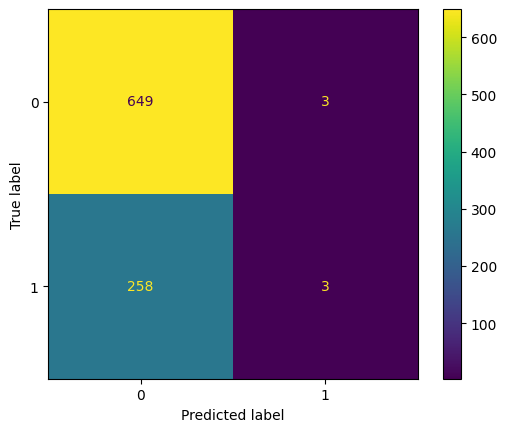

In [50]:
y_pred = model.predict(test_dataset).round().astype(int)
y_true = test_df['status'].values

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [51]:
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred, target_names=['Healthy', 'Diseased'])
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

     Healthy       0.72      1.00      0.83       652
    Diseased       0.50      0.01      0.02       261

    accuracy                           0.71       913
   macro avg       0.61      0.50      0.43       913
weighted avg       0.65      0.71      0.60       913

